In [20]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
from shutil import copyfile


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [21]:
def plotting(var_list,legend_list,log_scale=False,Title=None):
    i=0
    for var in var_list:
        i += 1
        x = range(len(var))
        plt.plot(x,var,linestyle="",marker="*",markersize=15,label=legend_list[i-1])
    plt.legend()    
    plt.ylabel("alpha [1e8]")
    plt.xlabel("run")
    if(log_scale==True):plt.yscale("log")
    if(Title):plt.title(Title)
    plt.show()
    return

In [22]:
df = pd.read_pickle("Akio_Nadav_Chas_Consv2.p")

In [27]:
print(df[:10])

   index  run_no_true        alpha  lambda direction  phase_val  \
0     34            0   67000000.0      18      pull         TF   
1     72            1    5400000.0       5      pull         TF   
2     79            2  100000000.0      12      pull  Random_TF   
3     65            3    4900000.0      18      pull         TF   
4     37            4   48000000.0      18      pull         TF   
5     64            5    1200000.0      18      pull         TF   
6     14            6  381000000.0      18      pull         TF   
7     38            7   58000000.0      18      pull         TF   
8     41            8   65000000.0      10      pull         TF   
9     15            9  434000000.0      18      pull         TF   

   akio_alpha_l5_p  akio_alpha_l10_p  akio_alpha_l25_p  akio_alpha_l5_n  ...  \
0             8.05              1.41              0.69            -1.66  ...   
1             2.35              0.42              0.21            -1.98  ...   
2             8.77    

In [ ]:
'''
columns: index=real run number, run_no_true=folder name you got, 
alpha = injected signal strength, lambda= lambda, direction=pull or push, 
phase_val=TF, means shifted by TF_phases = [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]
Random = Random
Random_TF = [1*np.random.normal(element,element/20) for element in TF_phases]
Flip = [-1.22,-0.97,-0.65,-0.49,-0.3,-0.12,-0.29,-0.13,-0.23,-0.22,-0.27,-0.27,-0.07]
your_name_lambdavalue_positve/negative
'''

In [19]:
# p = positive, n= negative, 

In [13]:
t1 = df.alpha[(df["lambda"]==5) & (df["direction"]=="pull") & (df['phase_val']=="TF") ]/1e8
a1 = df.akio_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
n1 = df.nadav_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
c1 = df.chas_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]


print(a1,n1,c1)
print(len(a1),len(n1),len(c1))

1     2.35
28    2.37
34    2.34
47    7.12
49    2.85
63    7.21
71    2.60
82    2.40
97    2.48
Name: akio_alpha_l5_p, dtype: float64 1     2.160412
28    2.173889
34    2.128274
47    8.509227
49    3.704910
63    8.606201
71    2.873134
82    2.276774
97    2.443657
Name: nadav_alpha_l5_p, dtype: float64 1     2.527899
28    2.542012
34    2.488217
47    8.423645
49    3.943205
63    8.503780
71    3.154772
82    2.652089
97    2.807071
Name: chas_alpha_l5_p, dtype: float64
9 9 9


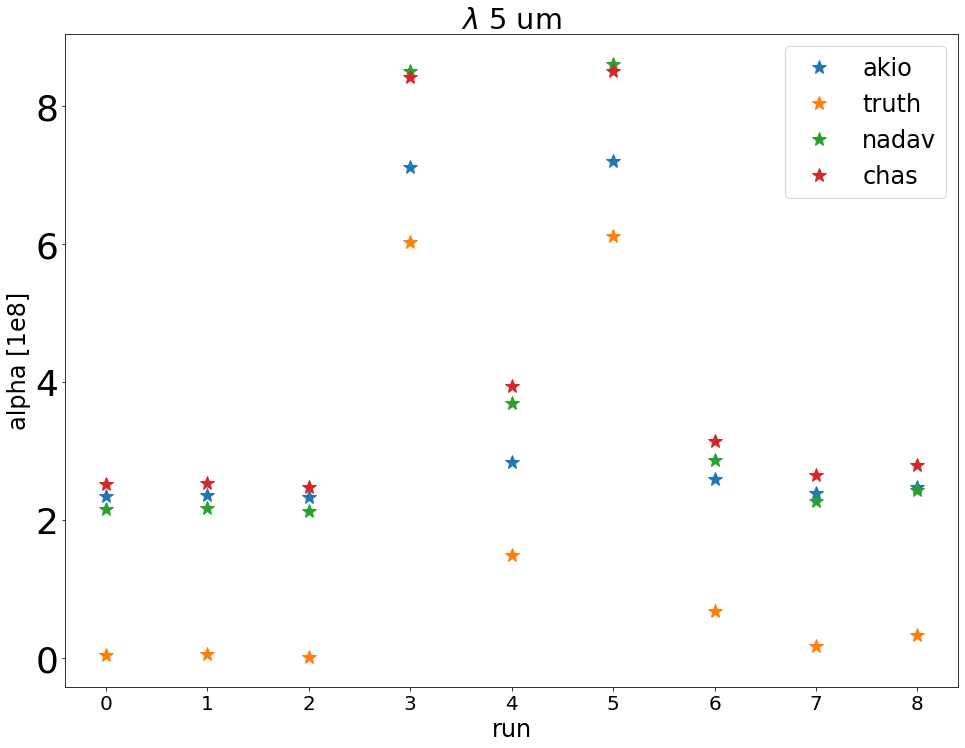

In [14]:
plotting([a1,t1,n1,c1],["akio","truth","nadav","chas"],Title="$\lambda$ 5 um")